In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from datetime import datetime

In [3]:
import pandas as pd
dataset=pd.read_csv("train.csv")      
dataset              

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


In [4]:
dataset.isnull().any()

Store           False
Dept            False
Date            False
Weekly_Sales    False
IsHoliday       False
dtype: bool

In [22]:
df=dataset.drop(['Store','Dept','IsHoliday'],axis=1)
df.head(3)

,Date,Weekly_Sales
0,2010-02-05,24924.50
1,2010-02-12,46039.49
2,2010-02-19,41595.55


# CONVERT TO DATETIME FORMAT

In [6]:
df['Date']=pd.to_datetime(df['Date'],infer_datetime_format=True)
indexedDataset=df.set_index(['Date'])
indexedDataset

,Weekly_Sales
Date,
2010-02-05,24924.50
2010-02-12,46039.49
2010-02-19,41595.55
2010-02-26,19403.54
2010-03-05,21827.90
...,...
2012-09-28,508.37
2012-10-05,628.10
2012-10-12,1061.02


Text(0.5, 1.0, 'Wallmart Sales')

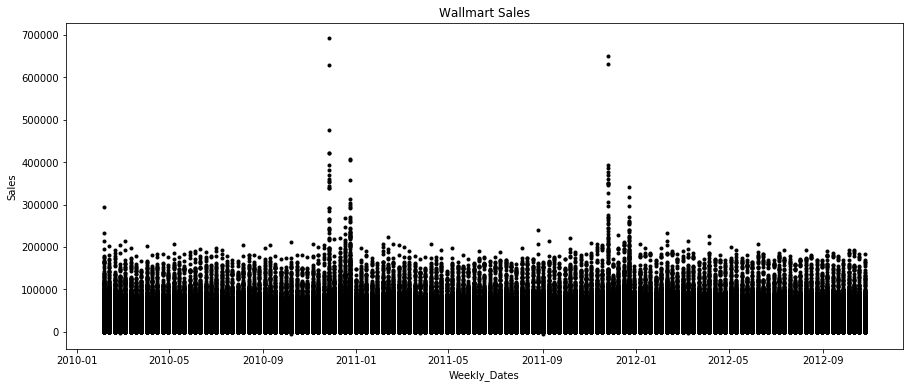

In [23]:
plt.rcParams['figure.figsize']=15,6
plt.plot(indexedDataset,'.',color="black")
plt.xlabel("Weekly_Dates")
plt.ylabel("Sales")
plt.title("Wallmart Sales")

# NO VISIBLE TREND, STILL CHECK FOR STATIONARITY 

# AD FULLER TEST

In [8]:
from statsmodels.tsa.stattools import adfuller
dftest=adfuller(indexedDataset['Weekly_Sales'])
dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','Lags used','Nobs'])
for key,value in dftest[4].items():
    dfoutput['Critical value (%s)' %key]=value
print(dfoutput)

Test Statistic             -31.988782
p-value                      0.000000
Lags used                   97.000000
Nobs                    421472.000000
Critical value (1%)         -3.430366
Critical value (5%)         -2.861547
Critical value (10%)        -2.566774
dtype: float64


# TIME SERIES IS STATIONARY AS THE ADF VALUE IS LESS THAN CRITICAL VALUE

In [9]:
#datasetdiffshifting=indexedDataset - indexedDataset.shift()
#datasetdiffshifting

In [10]:
#plt.plot(datasetdiffshifting,'.')

In [11]:
#datasetdiffshifting=datasetdiffshifting.fillna(0)
#datasetdiffshifting

 # ACF AND PACF PLOTS FOR p AND q parameters

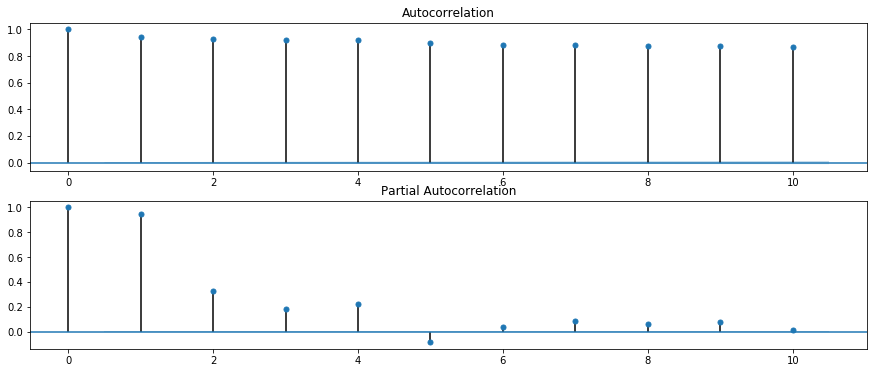

In [12]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
plt.figure()
plt.subplot(211)
plot_acf(indexedDataset, ax=plt.gca(),lags=10)
plt.subplot(212)
plot_pacf(indexedDataset, ax=plt.gca(),lags=10)
plt.show()

# ARIMA MODEL p=10, q=2

C:\Users\Naveen\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


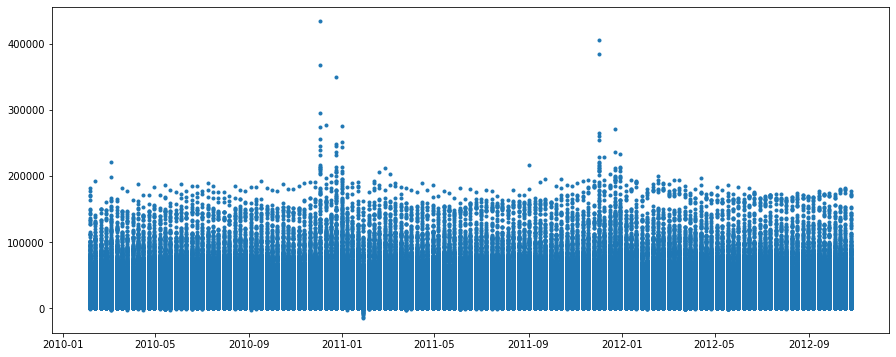

In [13]:
# pcf --> 2 significant spikes
# acf --> All 10 lags significant
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(indexedDataset,order=(10,0,2))
result=model.fit()
plt.plot(result.fittedvalues,'.')

In [14]:
pred_arima=pd.Series(result.fittedvalues,copy=True)
print(pred_arima)

Date
2010-02-05    15981.258334
2010-02-12    24433.722899
2010-02-19    37981.150617
2010-02-26    38713.433964
2010-03-05    25743.759603
                  ...     
2012-09-28      715.365546
2012-10-05      727.638106
2012-10-12      862.514484
2012-10-19     1029.871709
2012-10-26      962.177260
Length: 421570, dtype: float64


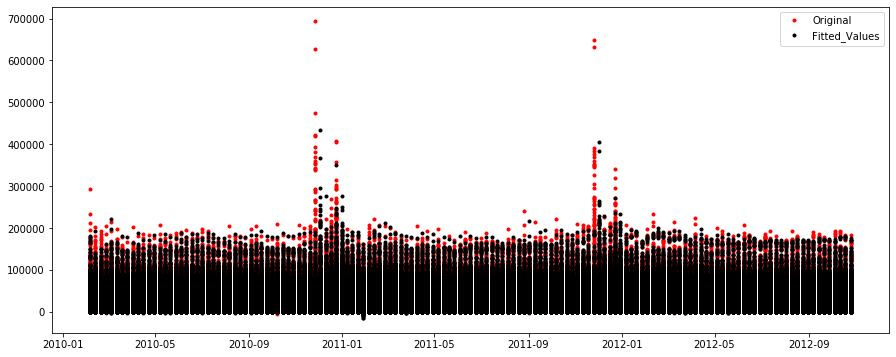

In [15]:
plt.plot(indexedDataset,'.',color="red",label="Original")
plt.plot(pred_arima,'.',color="black",label="Fitted_Values")
plt.legend(loc="best")

In [80]:
test=pd.read_csv("test.csv")
test

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False
...,...,...,...,...
115059,45,98,2013-06-28,False
115060,45,98,2013-07-05,False
115061,45,98,2013-07-12,False
115062,45,98,2013-07-19,False


In [81]:
test['Date']=pd.to_datetime(test['Date'],infer_datetime_format=True)
test=test.set_index(['Date'])
test

,Store,Dept,IsHoliday
Date,,,
2012-11-02,1,1,False
2012-11-09,1,1,False
2012-11-16,1,1,False
2012-11-23,1,1,True
2012-11-30,1,1,False
...,...,...,...
2013-06-28,45,98,False
2013-07-05,45,98,False
2013-07-12,45,98,False


In [110]:
Forecasted=result.forecast(steps=len(test))
Forecasted

(array([ 1136.54208794,  1289.46593923,  1275.11848899, ...,
        15981.25833443, 15981.25833443, 15981.25833443]),
 array([ 6620.80869716,  7514.49670005,  8086.43736456, ...,
        22707.98575148, 22707.98575148, 22707.98575148]),
 array([[-11840.00450703,  14113.0886829 ],
        [-13438.67695482,  16017.60883327],
        [-14574.00750879,  17124.24448677],
        ...,
        [-28525.57589993,  60488.09256878],
        [-28525.57589993,  60488.09256878],
        [-28525.57589993,  60488.09256878]]))

In [113]:
# [0] : Forecast values , [1] : Standard errors , [2] : Confidence interval  
test['Sales']=Forecasted[0]

In [115]:
test.head()

,Store,Dept,IsHoliday,Sales
Date,,,,
2012-11-02,1,1,False,1136.542088
2012-11-09,1,1,False,1289.465939
2012-11-16,1,1,False,1275.118489
2012-11-23,1,1,True,1396.302017
2012-11-30,1,1,False,1464.810545
